<a href="https://colab.research.google.com/github/18K41A0278SALMAN/NNDL278/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = [[0.2,3.4],[0.4,3.8],[0.6,4.2],[0.8,4.6]] 
data_x = []
data_y = []
for i in range(len(data)):
  data_x.append(data[i][0])
  data_y.append(data[i][1])

data_x = np.array(data_x)
data_y = np.array(data_y)


In [ ]:
# INITIALISING BATCH SIZE AND CALCULATING NUMBER OF BATCHES
bs = 2
nb = np.ceil(len(data)/bs)
print(nb)

2.0


In [ ]:
# SHUFFLING DATA POINTS
import random
samples = np.arange(len(data))
random.shuffle(samples)
print(samples)

[1 2 0 3]


In [ ]:
for i in samples:
  print(data_x[i],data_y[i])

0.4 3.8
0.6 4.2
0.2 3.4
0.8 4.6


In [ ]:
iter = 1
epochs = 500
batch = nb - 1
bat = 1
n = 0.1 
m = 1
c = -1

In [ ]:
while (iter<=epochs):
  i = 0
  # RUNNING ITERATION FOR N-1 BATCHES
  while (bat <= batch):
    der_m = 0
    der_c = 0
    err = 0
    for k in range(0,bs):
      der_m = der_m + (data_y[samples[i]] - (m*data_x[samples[i]])-c)*(data_x[samples[i]])
      der_c = der_c + (data_y[samples[i]] - (m*data_x[samples[i]])-c)
      i = i+1
      
    # err = der_c**2
    # err = (1/(2*bs))*err
    # error.append(err)
    
    der_m = (1/bs)*der_m
    der_c = (1/bs)*der_c
    change_m = (-1)*n*der_m
    change_c = (-1)*n*der_c
    
    m = m + change_m
    c = c + change_c
    bat = bat + 1
    
 
  # EXECUTING FOR LAST BATCH
  der_m = 0
  der_c = 0
  err = 0
  # FINDING REMAINING NUMBER OF BATCHES
  es = len(samples) - i  
  
  for k in range(i,len(samples)):
    der_m = der_m + (data_y[samples[i]] - (m*data_x[samples[i]])-c)*(data_x[samples[i]])
    der_c = der_c + (data_y[samples[i]] - (m*data_x[samples[i]])-c)
    i = i + 1
  der_m = (-1/es)*der_m
  der_c = (-1/es)*der_c
  
  change_m = (-1)*n*der_m
  change_c = (-1)*n*der_c
  
  m = m + change_m
  c = c + change_c
  
  iter = iter + 1

print(m,c)

2.1181378779571687 2.9384908568091244


In [ ]:
# MEAN SQUARE ERROR IN EXPONENTIAL FORM
# MINIMISED ERROR
mse = 0
for i in range(0,len(data)):
  mse += (data_y[i] - (m*data_x[i]) -c)**2
mse = (1/len(data))*mse
print(mse)

0.0007037825070088345


In [ ]:
pred = []
for i in range(0,len(data)):
  pred.append(m*data_x[i] + c)
pred

[3.362118432400558, 3.785746007991992, 4.209373583583425, 4.633001159174859]

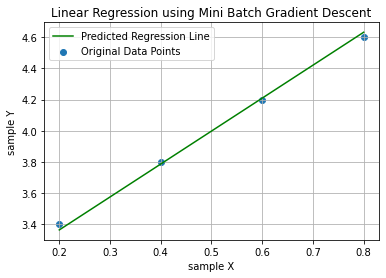

In [ ]:
plt.scatter(data_x,data_y,label='Original Data Points')
plt.plot(data_x,pred,'green',label='Predicted Regression Line')
plt.legend()
plt.title("Linear Regression using Mini Batch Gradient Descent")
plt.xlabel("sample X")
plt.ylabel("sample Y")
plt.grid()